In [2]:
import fastbook
fastbook.setup_book()

In [3]:
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

In [4]:
path = untar_data(URLs.CAMVID_TINY)

dls = SegmentationDataLoaders.from_label_func(
    path,
    bs=8,
    fnames=get_image_files(path/"images"),
    label_func=lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes=np.loadtxt(path/'codes.txt', dtype=str))

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


d:\Projects\PythonProjects\DLS-Rush\venv\lib\site-packages\torch\_tensor.py:1142: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Vadim/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.008299,2.424741,00:28


epoch,train_loss,valid_loss,time
0,1.772811,1.566294,00:33
1,1.555523,1.276595,00:31
2,1.388780,1.068932,00:28
3,1.244944,0.924168,00:31
4,1.119481,0.781905,00:31
5,1.011875,0.783753,00:31
6,0.927787,0.715191,00:31
7,0.860944,0.707224,00:30


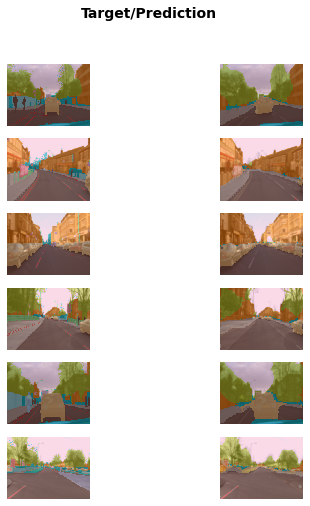

In [5]:
learn.show_results(max_n=6, figsize=(7,8))